# Digit and Letter Recognition Module (SVM）

## IMPORTANT!!! this program is using 3 SVM with different kernels, if the total train data is exceeding 10k , modeling and predicting might take more than an hour to finish

Each train data is in the 28x28 resolution format, so the computing demand is about, (numbers of training data) x 28 x 28 

# Dependencies

In [2]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
from PIL import Image

# Global Variables

In [3]:
digit_train_size = 1000
digit_test_size = 10000

letter_train_size = 9000
letter_test_size = 20800

digit_train_size is to determine the numbers of training datas for digits, maximum train data for digits is 60k

digit_test_size is to determine the numbers of test datas for digits, maximum is 10k

letter_train_size is to determine the numbers of training datas for letters, maximum train data for letters is 185k

letter_test_size is to determine the numbers of test datas for letters, maximum is 20.8k

# Data Preparation


#### Digit Files

In [4]:
x_tr_digit_fls = gzip.open('train-images-idx3-ubyte.gz','r')
x_te_digit_fls = gzip.open('test-images-idx3-ubyte.gz','r')

y_tr_digit_fls = gzip.open('train-labels-idx1-ubyte.gz','r')
y_te_digit_fls = gzip.open('test-labels-idx1-ubyte.gz','r')

#### Letter Files

In [5]:
x_tr_letter_fls = gzip.open('emnist-letters-train-images-idx3-ubyte.gz','r')
x_te_letter_fls = gzip.open('emnist-letters-test-images-idx3-ubyte.gz','r')

y_tr_letter_fls = gzip.open('emnist-letters-train-labels-idx1-ubyte.gz','r')
y_te_letter_fls = gzip.open('emnist-letters-test-labels-idx1-ubyte.gz','r')

#### Opening Digit Files

In [6]:
image_size = 28
num_images = digit_train_size
x_tr_digit_fls.read(16)
buf = x_tr_digit_fls.read(image_size * image_size * num_images)
x_tr_digit_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_tr_digit_raw = x_tr_digit_raw.reshape(num_images, image_size, image_size, 1)

image_size = 28
num_images = digit_test_size
x_te_digit_fls.read(16)
buf = x_te_digit_fls.read(image_size * image_size * num_images)
x_te_digit_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_te_digit_raw = x_te_digit_raw.reshape(num_images, image_size, image_size, 1)

#### Opening Letter Files

In [7]:
image_size = 28
num_images = letter_train_size
x_tr_letter_fls.read(16)
buf = x_tr_letter_fls.read(image_size * image_size * num_images)
x_tr_letter_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_tr_letter_raw = x_tr_letter_raw.reshape(num_images, image_size, image_size, 1)

image_size = 28
num_images = letter_test_size
x_te_letter_fls.read(16)
buf = x_te_letter_fls.read(image_size * image_size * num_images)
x_te_letter_raw = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_te_letter_raw = x_te_letter_raw.reshape(num_images, image_size, image_size, 1)

#### Processing the file into each of a single element on it

In [8]:
y_tr_digit_fls.read(8)
y_tr_digit_list = []
for i in range(0,digit_train_size):   
    buf = y_tr_digit_fls.read(1)
    y_tr_digit_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_te_digit_fls.read(8)
y_te_digit_list = []
for i in range(0,digit_test_size):   
    buf = y_te_digit_fls.read(1)
    y_te_digit_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_tr_letter_fls.read(8)
y_tr_letter_list = []
for i in range(0,letter_train_size):   
    buf = y_tr_letter_fls.read(1)
    y_tr_letter_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
    
y_te_letter_fls.read(8)
y_te_letter_list = []
for i in range(0,letter_test_size):   
    buf = y_te_letter_fls.read(1)
    y_te_letter_list.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))

### Processing the file into int64 format from uint8


#### These are the first 5 image for digit recognition training

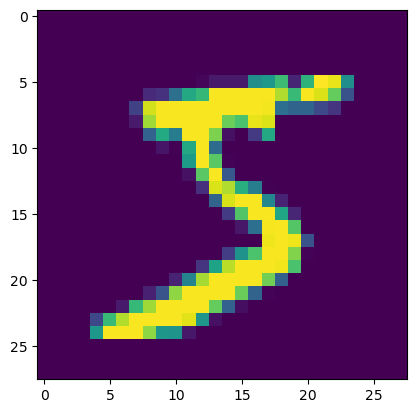

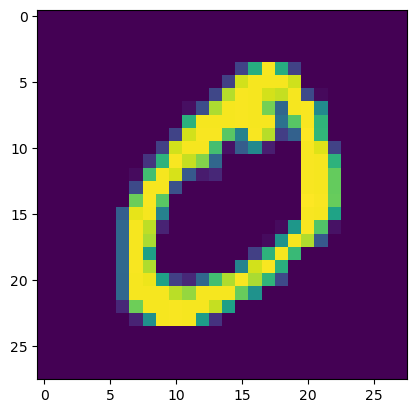

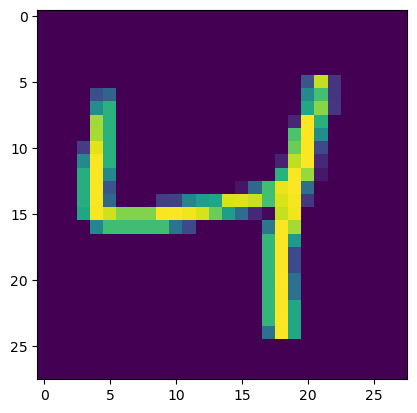

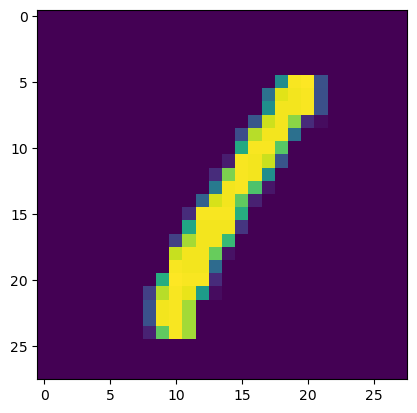

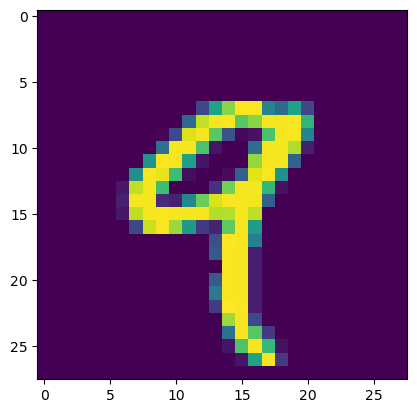

In [9]:
for i in range(5):
    image = np.asarray(x_tr_digit_raw[i]).squeeze()
    plt.imshow(image)
    plt.show()

#### These are the first 5 digit labels for the corresponding images

In [10]:
y_tr_digit = pd.DataFrame(y_tr_digit_list, columns =['labels'])
y_te_digit = pd.DataFrame(y_te_digit_list, columns =['labels'])
y_tr_digit.head(5)

,labels
0,5
1,0
2,4
3,1
4,9


#### These are the first 5 image for letter recognition training

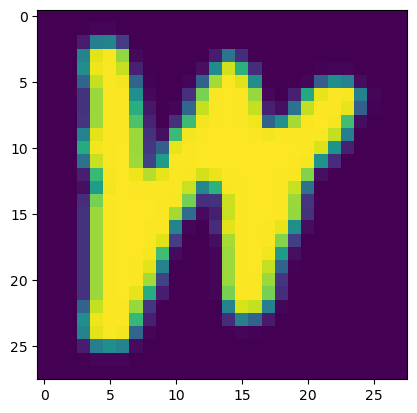

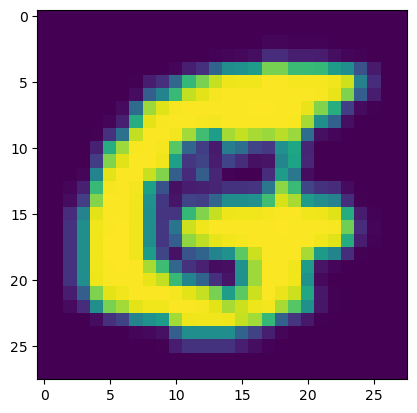

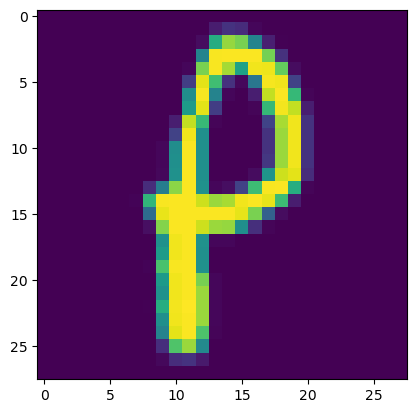

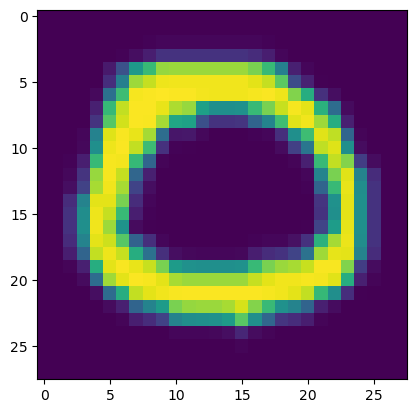

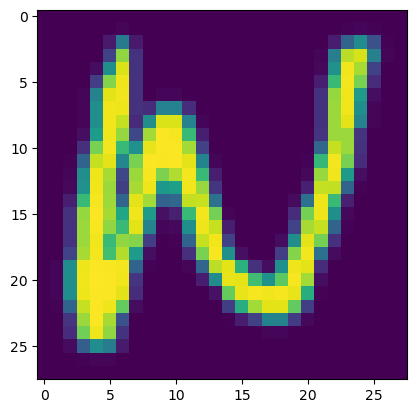

In [11]:
for i in range(5):
    image = np.asarray(np.rot90(np.flip(x_tr_letter_raw[i], 0), k=1, axes=(1, 0))).squeeze()
    plt.imshow(image)
    plt.show()

#### These are the first 5 letter labels for the corresponding images

In [12]:
y_tr_letter = pd.DataFrame(y_tr_letter_list, columns =['labels'])
y_te_letter = pd.DataFrame(y_te_letter_list, columns =['labels'])
y_tr_letter = y_tr_letter.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
y_te_letter = y_te_letter.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
y_tr_letter.head(5)

,labels
0,W
1,G
2,P
3,O
4,W


#### Converting a 2d array of the image into a 1d array format and substitude into a Dataframe

In [13]:
x_tr_digit_ravel = []
for i in range(digit_train_size):
    x_tr_digit_ravel.append(pd.DataFrame(np.asarray(x_tr_digit_raw[i].ravel()).squeeze()).squeeze())
x_tr_digit = pd.DataFrame(x_tr_digit_ravel)

x_te_digit_ravel = []
for i in range(digit_test_size):
    x_te_digit_ravel.append(pd.DataFrame(np.asarray(x_te_digit_raw[i].ravel()).squeeze()).squeeze())
x_te_digit = pd.DataFrame(x_te_digit_ravel)

x_tr_letter_ravel = []
for i in range(letter_train_size):
    x_tr_letter_ravel.append(pd.DataFrame(np.asarray(np.rot90(np.flip(x_tr_letter_raw[i], 0), k=1, axes=(1, 0)).ravel()).squeeze()).squeeze())
x_tr_letter = pd.DataFrame(x_tr_letter_ravel)

x_te_letter_ravel = []
for i in range(letter_test_size):
    x_te_letter_ravel.append(pd.DataFrame(np.asarray(np.rot90(np.flip(x_te_letter_raw[i], 0), k=1, axes=(1, 0)).ravel()).squeeze()).squeeze())
x_te_letter = pd.DataFrame(x_te_letter_ravel)

In [14]:
x_tr = x_tr_digit.append(x_tr_letter)
x_te = x_te_digit.append(x_te_letter)

y_tr = y_tr_digit.append(y_tr_letter)
y_te = y_te_digit.append(y_te_letter)

C:\Users\JEhew\AppData\Local\Temp\ipykernel_2936\3949832956.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_tr = x_tr_digit.append(x_tr_letter)
C:\Users\JEhew\AppData\Local\Temp\ipykernel_2936\3949832956.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_te = x_te_digit.append(x_te_letter)
C:\Users\JEhew\AppData\Local\Temp\ipykernel_2936\3949832956.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_tr = y_tr_digit.append(y_tr_letter)
C:\Users\JEhew\AppData\Local\Temp\ipykernel_2936\3949832956.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_te = y_te_digit.append(y_te_letter)


#### Combining digit dataset with letter dataset

In [15]:
y_tr = y_tr.astype('str')
y_te = y_te.astype('str')

# Modeling (Linear SVM)

In [16]:
model = svm.SVC(kernel='linear')
model.fit(x_tr, y_tr)

c:\Users\JEhew\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Modeling (RBF SVM)

In [17]:
model2 = svm.SVC(kernel='rbf', gamma='scale')
model2.fit(x_tr, y_tr)

c:\Users\JEhew\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

# Modeling (Polynomial SVM)

In [18]:
model3 = svm.SVC(kernel='poly', degree=3, gamma='scale')
model3.fit(x_tr, y_tr)

c:\Users\JEhew\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

# Result (Linear SVM)

In [19]:
model.score(x_te, y_te)

0.7285714285714285

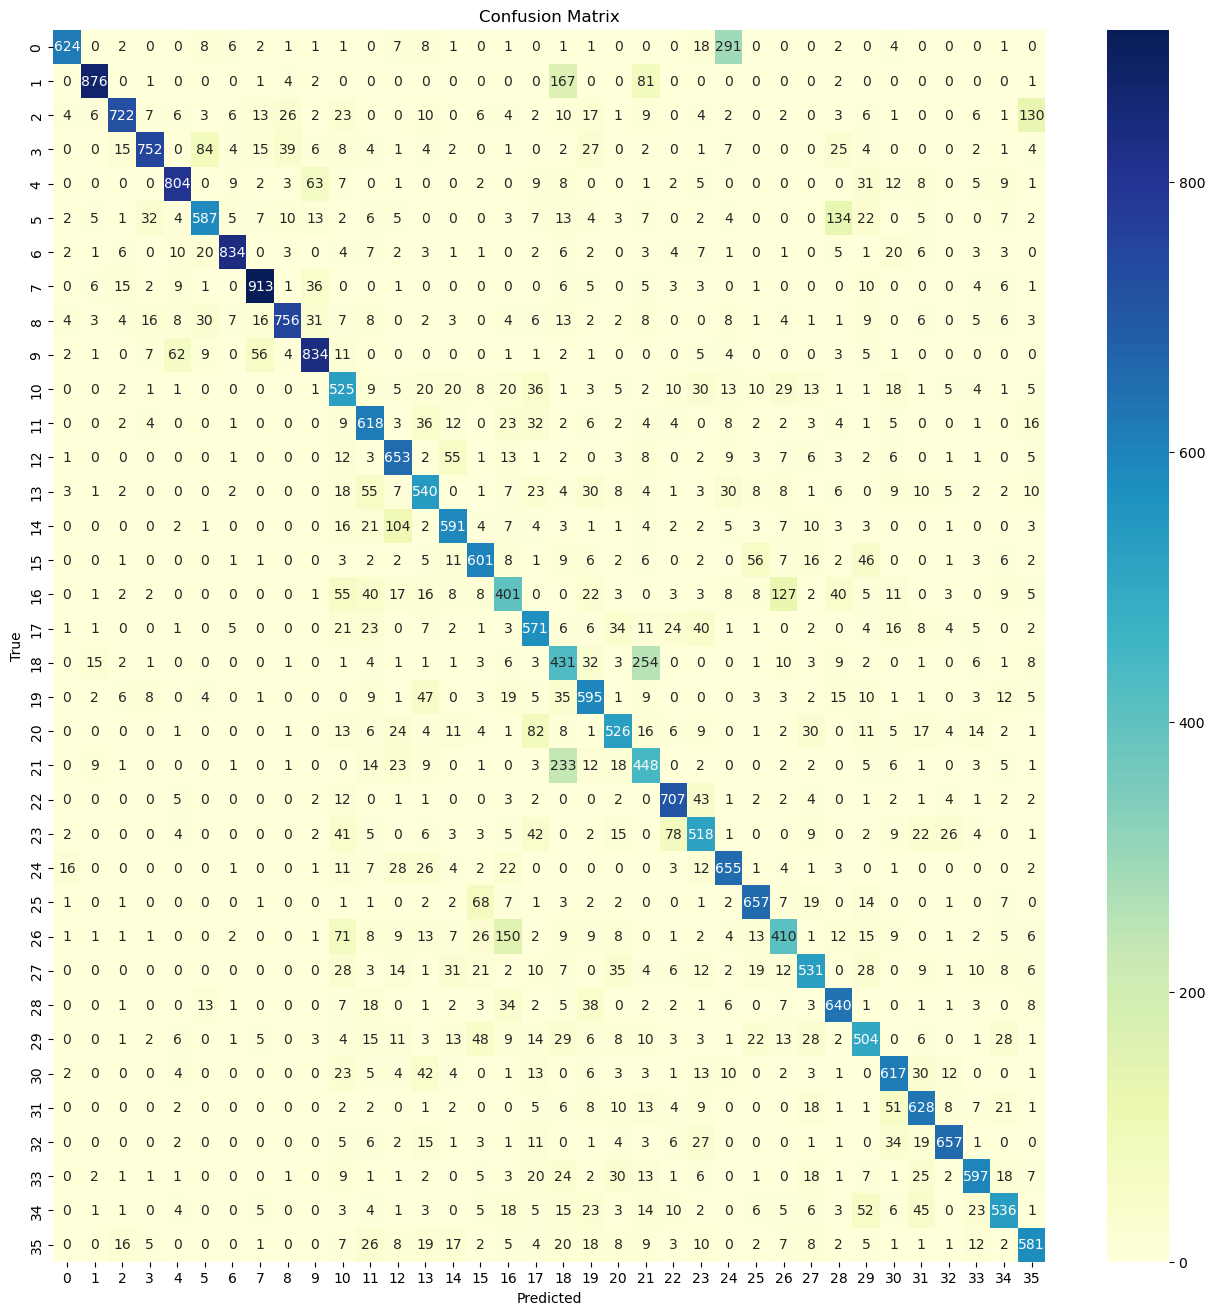

In [20]:
# Generate predictions from the model
y_pred = model.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

# Result (RBF SVM)

In [23]:
model2.score(x_te, y_te)

0.799025974025974

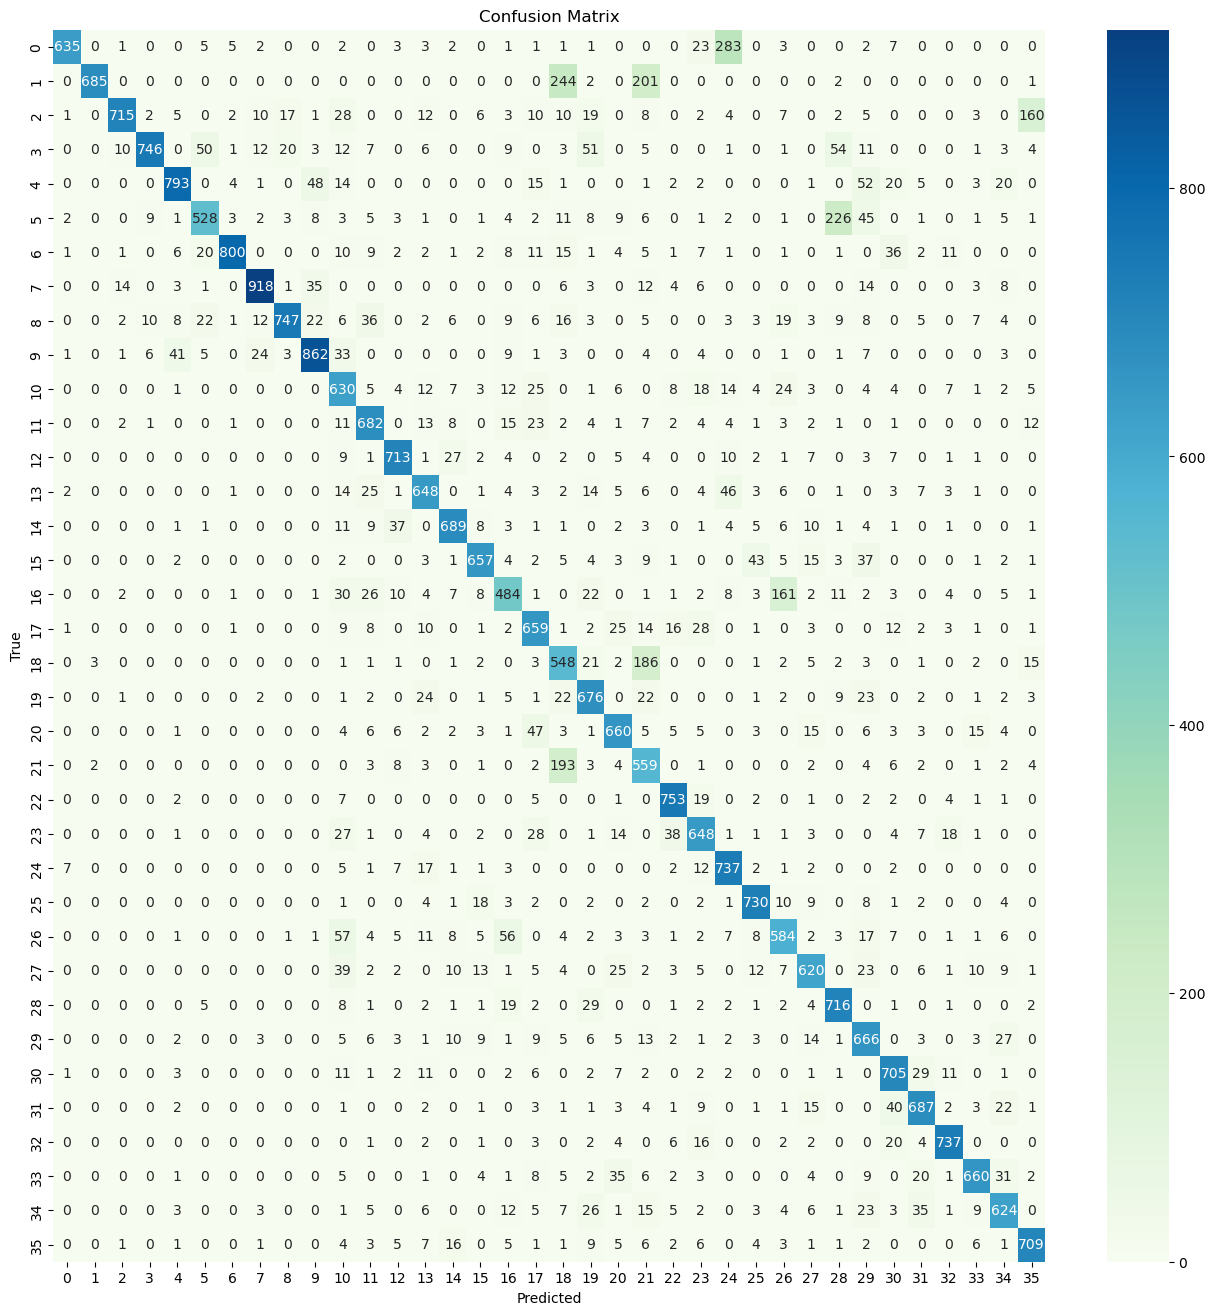

In [24]:
# Generate predictions from the model
y_pred = model2.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


# Result (Polynomial SVM)

In [25]:
model3.score(x_te, y_te)

0.7471103896103896

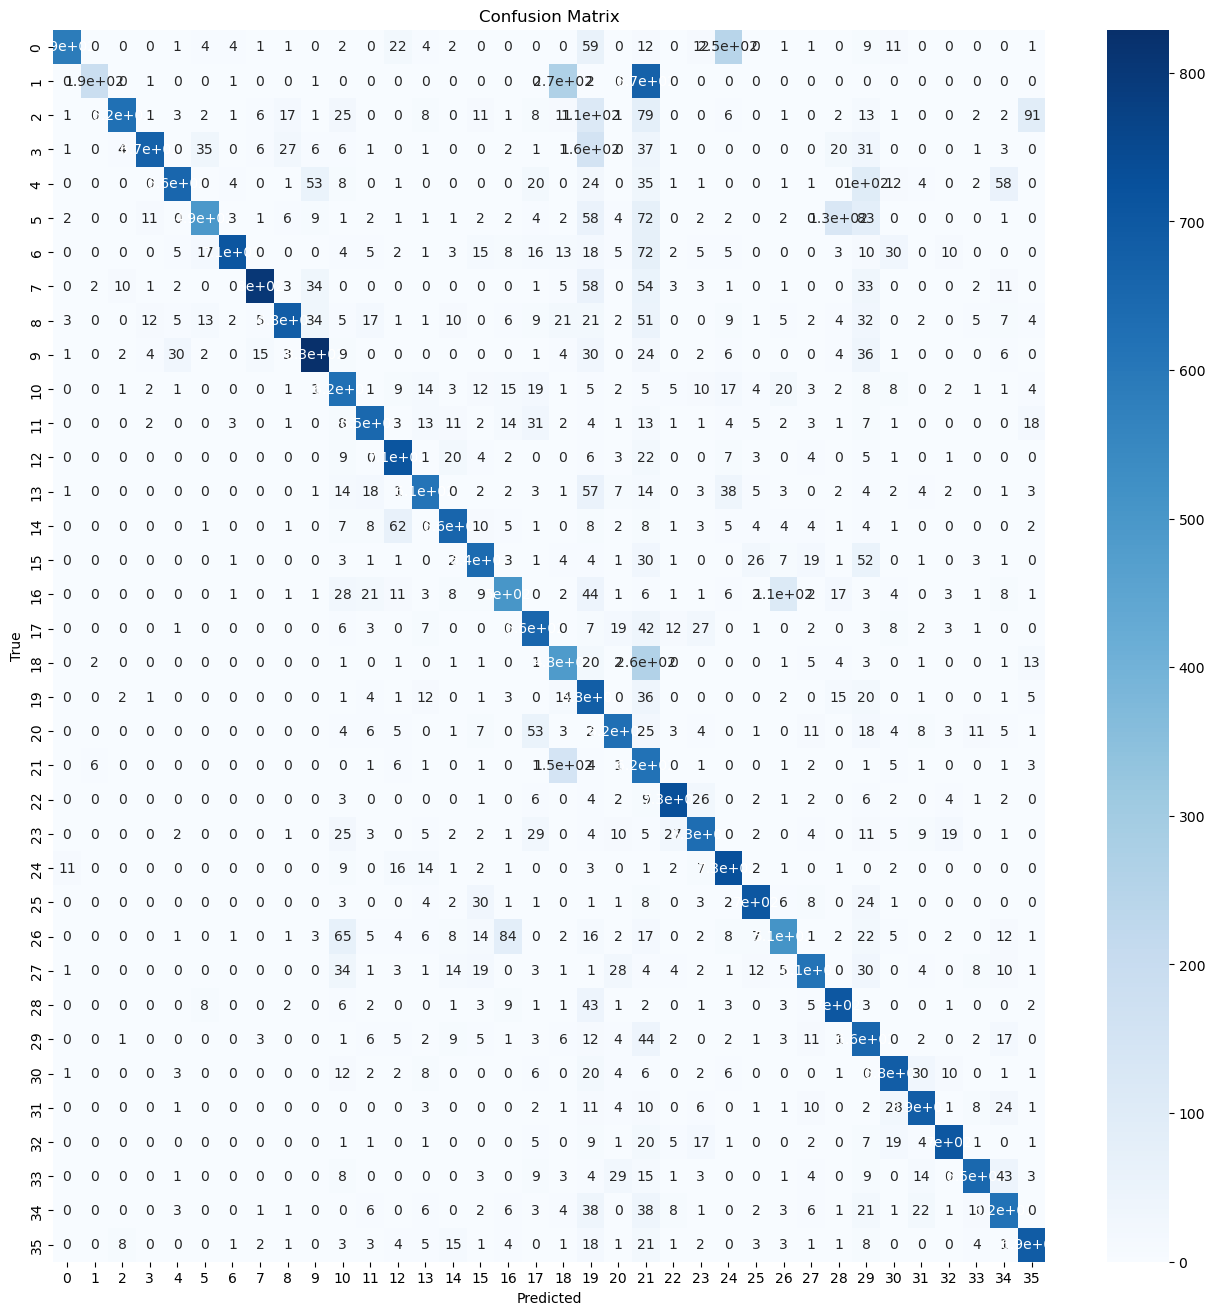

In [26]:
# Generate predictions from the model
y_pred = model3.predict(x_te)

# Create a confusion matrix
cm = confusion_matrix(y_te, y_pred)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, ax=ax)

# Add labels and a title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()